In [1]:
from infrastructure.dataclasses import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameteres=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="entropic_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=4,
        epsilon=1e-7,
        number_of_samples_for_entropy_dual_estimation=2048,
        activation_function_name="ELU"
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=500,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 500, Objective: 1.216, LR: 0.000000: 100%|██████████| 500/500 [11:07<00:00,  1.34s/it]


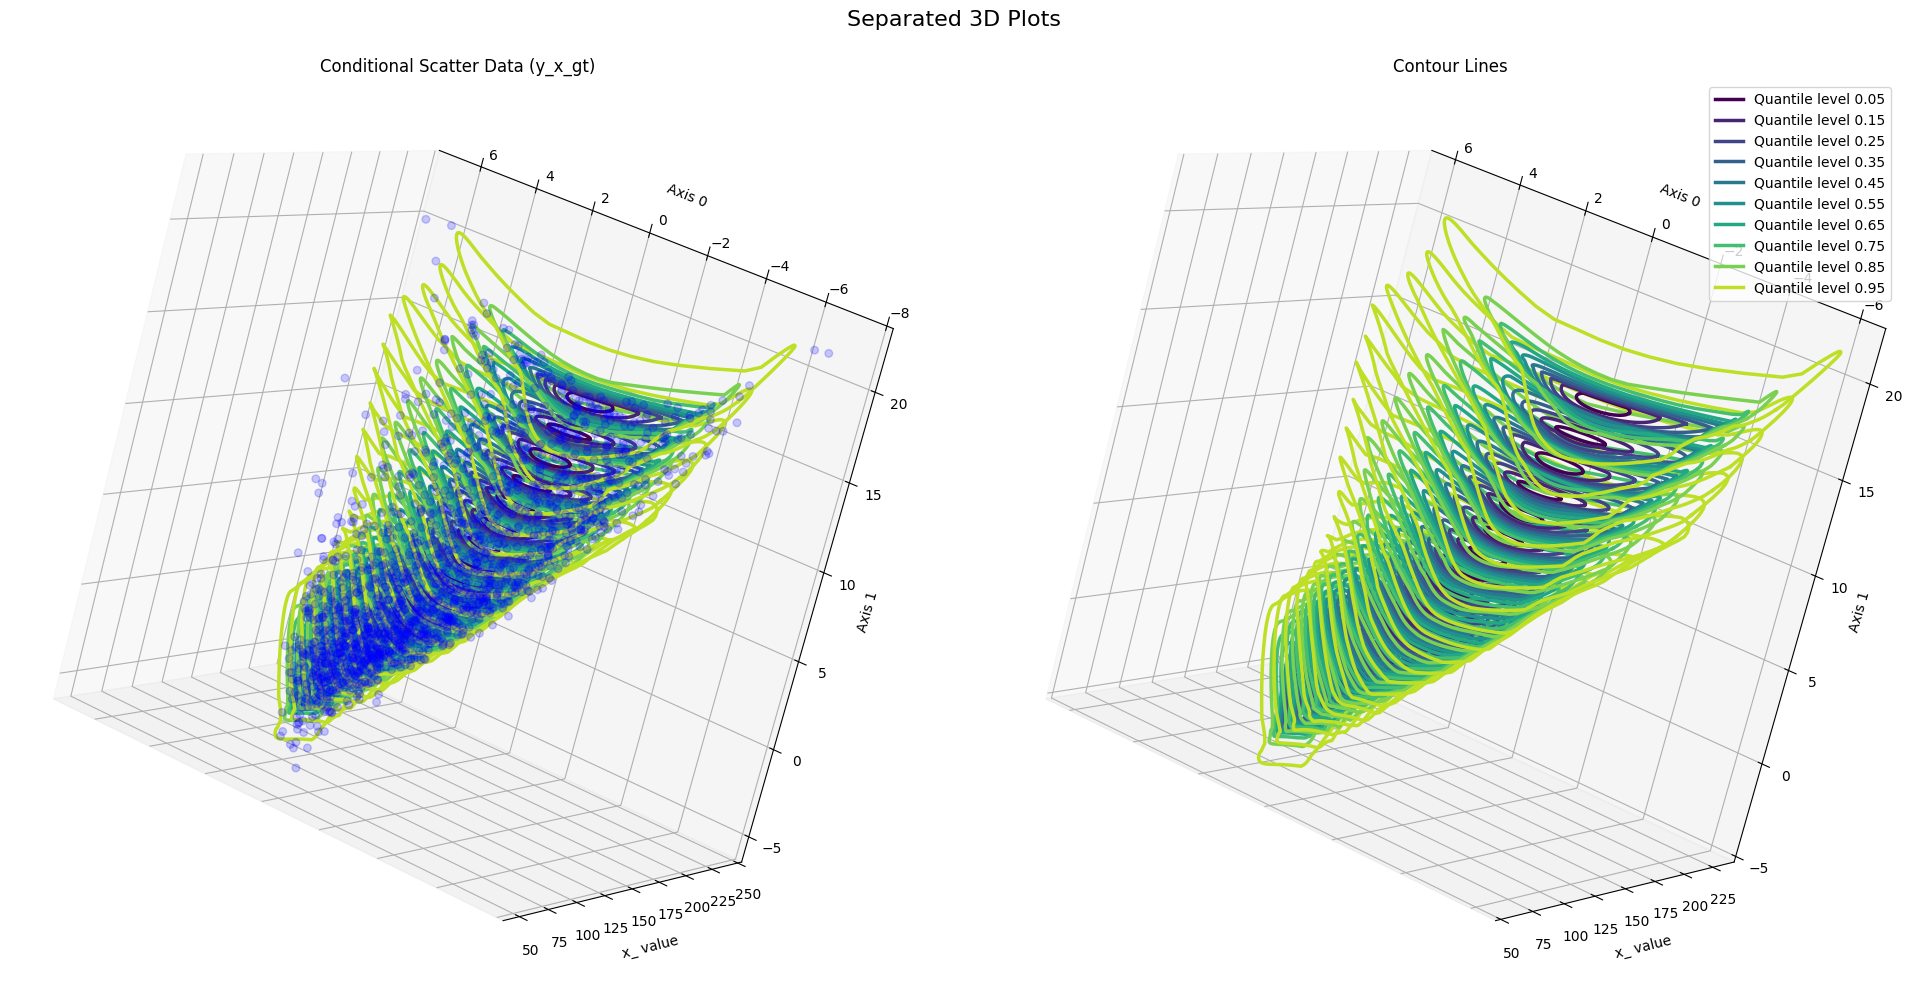

: 

In [ ]:
%matplotlib inline
from utils import plot_potentials_from_banana_dataset

model.eval()
plot_potentials_from_banana_dataset(model=model, device_and_dtype_specifications=experiment.tensor_parameteres)